In [3]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

import matplotlib.pyplot as plt


In [5]:
spy_etf = web.DataReader('SPY', 'yahoo')
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-09-14 to 2020-09-10
Data columns (total 6 columns):
High         1258 non-null float64
Low          1258 non-null float64
Open         1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null float64
Adj Close    1258 non-null float64
dtypes: float64(6)
memory usage: 68.8 KB


In [6]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-14,197.009995,195.429993,196.949997,196.009995,79452000.0,177.454758
2015-09-15,198.990005,195.960007,196.610001,198.460007,113806200.0,179.672806
2015-09-16,200.410004,198.410004,198.820007,200.179993,99581600.0,181.229980
2015-09-17,202.889999,199.279999,200.020004,199.729996,276046600.0,180.822556
2015-09-18,198.679993,194.960007,195.710007,195.449997,223657500.0,177.867691


In [7]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-03,356.380005,342.589996,355.869995,345.390015,148011100.0,345.390015
2020-09-04,347.829987,334.869995,346.130005,342.570007,139156300.0,342.570007
2020-09-08,342.640015,332.880005,336.709991,333.209991,114465300.0,333.209991
2020-09-09,342.459991,336.609985,337.549988,339.790009,91462300.0,339.790009
2020-09-10,342.529999,332.850006,341.820007,333.890015,90293900.0,333.890015


In [9]:
start = pd.to_datetime('2015-09-14')
end = pd.to_datetime('2020-09-10')


In [10]:
aapl = web.DataReader('AAPL','yahoo',start,end)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-14,29.222500,28.715000,29.145000,28.827499,233453600.0,26.639898
2015-09-15,29.132500,28.605000,28.982500,29.070000,173364800.0,26.863998
2015-09-16,29.135000,28.860001,29.062500,29.102501,148694000.0,26.894033
2015-09-17,29.122499,28.430000,28.915001,28.480000,256450400.0,26.318771
2015-09-18,28.575001,27.967501,28.052500,28.362499,297141200.0,26.210186


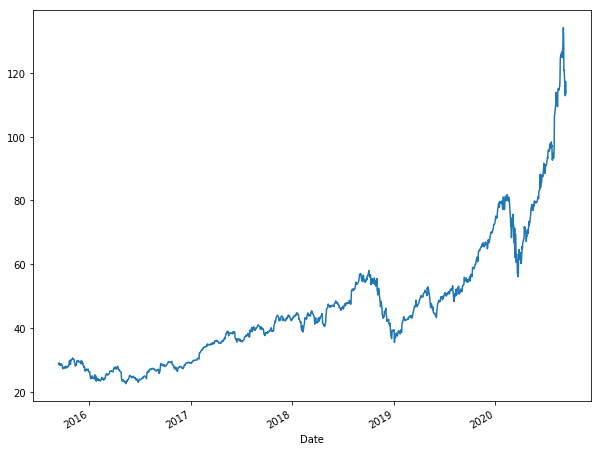

In [16]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))


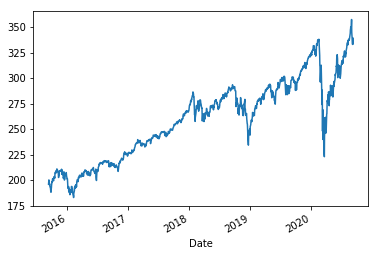

In [17]:
spy_etf['Close'].plot(label='SPY Index')

NameError: name 'plt' is not defined

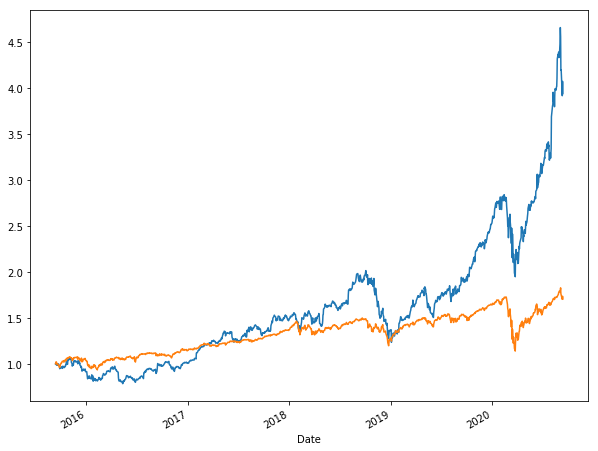

In [19]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()

In [23]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)


In [24]:
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

NameError: name 'plt' is not defined

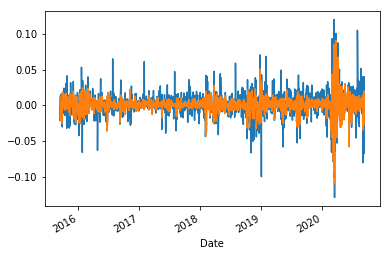

In [29]:
aapl['Daily Return'].plot(label='AAPL')
spy_etf['Daily Return'].plot(label='spy index')
plt.legend(alpha=0.25)


In [30]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [31]:
beta

0.4808081142870811

In [32]:
alpha

-0.0001126609723588563

In [33]:
r_value

0.7515799798507388

In [34]:
std_err

0.011911953928045886

In [35]:
p_value

5.1072309093541506e-229

In [36]:
spy_etf['Daily Return'].head()


Date
2015-09-14         NaN
2015-09-15    0.012499
2015-09-16    0.008667
2015-09-17   -0.002248
2015-09-18   -0.021429
Name: Daily Return, dtype: float64

In [44]:
import numpy as np
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))
noise

array([ 0.00014506, -0.00043297,  0.00081113, ..., -0.00097832,
       -0.0003403 , -0.00028793])

In [39]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

In [40]:
fake_stock.head()

Date
2015-09-15    0.037466
2015-09-16    0.037381
2015-09-17   -0.020396
2015-09-18   -0.019253
2015-09-21   -0.003481
Name: Daily Return, dtype: float64

NameError: name 'plt' is not defined

0.4808081142870811

In [45]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [46]:
beta

0.5680247005210954

In [47]:
alpha

0.0004930436523459083

In [48]:
r_value

0.7492977207077025

NameError: name 'plt' is not defined

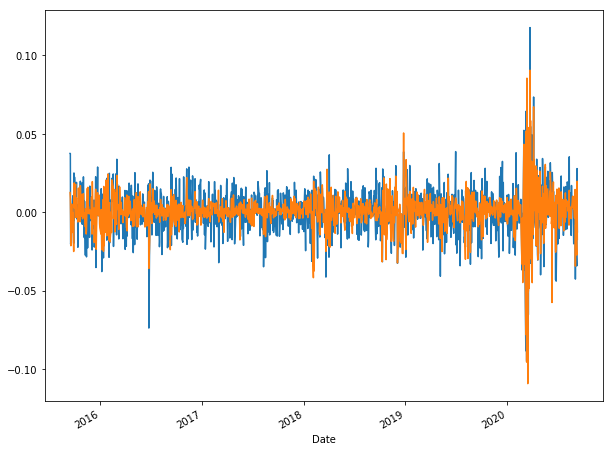

In [49]:
fake_stock.plot(label='FAKE',figsize=(10,8))
spy_etf['Daily Return'].plot(label = 'SPY index')
plt.legend()